<a href="https://colab.research.google.com/github/dunguyen0102/ml_k46/blob/main/IRIS_GMM_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import các thư viện

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# Load dataset và sử dụng StandardScaler, PCA để tiền xử lý dữ liệu

In [53]:
# Load the iris dataset
iris = load_iris()

# Scale the dataset
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)

# Apply PCA to select 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Dữ liệu sau khi lấy 2 thành phần chính bằng PCA

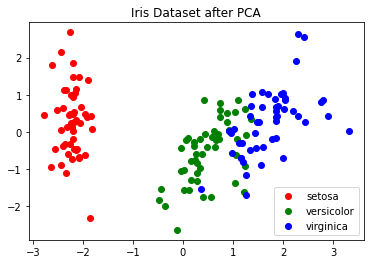

In [54]:
# Plot the results
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1], c=colors[i], label=iris.target_names[i])
plt.legend()
plt.title('Iris Dataset after PCA')
plt.show()

# Áp dụng kmeans để cluster thành 3 cụm

In [55]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

# Predict the clusters
y_pred = kmeans.predict(X_pca)


# Kết quả sau khi gom cụm bằng KMeans


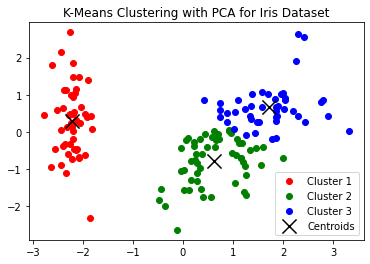

In [56]:

# Plot the results
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='k', label='Centroids')
plt.legend()
plt.title('K-Means Clustering with PCA for Iris Dataset')
plt.show()

# Tính adjusted_rand_score

In [57]:
ri_kmeans = adjusted_rand_score(iris.target, y_pred)

print(f"Adjusted Rand score for KMeans: {ri_kmeans:.3f}")

Adjusted Rand score for KMeans: 0.601


In [58]:
# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X_pca)

# Predict the clusters
y_pred = gmm.predict(X_pca)

# Tính adjusted_rand_score

In [59]:
ri_gmm = adjusted_rand_score(iris.target, y_pred)

print(f"Adjusted Rand score for GMM: {ri_gmm:.3f}")

Adjusted Rand score for GMM: 0.689


# Kết quả sau khi gom cụm bằng GMM

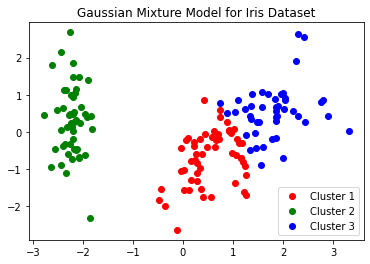

In [60]:
# Plot the results
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.legend()
plt.title('Gaussian Mixture Model for Iris Dataset')
plt.show()